In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])
import numpy as np

In [3]:
# Read in Revenue Files
file_2007 = "../../datasets/subsets/other_metrics/other_met_2007.csv"

other_2007 = pd.read_csv(file_2007)
other_2007 = other_2007.set_index(['STNAME'])
other_2007

,2007_E3A11,2007_E3A12,2007_E3A13,2007_E3A14,2007_E3A2,2007_E3A16,2007_E3A1,2007_E3B11,2007_E3B12,2007_E3B13,...,2007_X12D,2007_X12E,2007_X12F,2007_TX12,2007_NCE13,2007_ADA,2007_A14A,2007_A14B,2007_PPE15,2007_MEMBR
STNAME,,,,,,,,,,,,,,,,,,,,,
alabama,137483273,89477388,8805250,175727560,9845741,247364.0,411740835,NaN,NaN,NaN,...,18915190.0,3018178.0,NaN,492466089,5752565053,714302,NaN,714302.0,8053,743632
alaska,16618449,8459064,1000434,21155696,446550,NaN,47233643,586873.0,252122.0,3211235.0,...,1339065.0,1914033.0,54091.0,63888138,1570428060,120988,120988.0,NaN,12980,132608
arizona,103137811,30487218,58811910,144060255,19083795,8936766.0,345433960,NaN,NaN,NaN,...,NaN,3648934.0,NaN,518890857,7296829426,972404,972404.0,NaN,7504,1068249
arkansas,77430661,22432551,4999642,103117273,2219805,178648.0,208158775,2750.0,210.0,1255695.0,...,NaN,1055746.0,NaN,263055584,3734645032,436804,436804.0,NaN,8550,476409
california,712905952,266627043,64453044,1011684686,14980541,226778.0,2055897503,62310271.0,26148485.0,21881283.0,...,285680759.0,2096523.0,16338720.0,2743176425,54609422591,6351774,6351774.0,NaN,8598,6406750
colorado,72386848,19676641,12322113,106410969,6180115,1118233.0,211914804,19321046.0,4647447.0,2925021.0,...,1195572.0,1830064.0,140497.0,468089840,6110963138,722168,722168.0,NaN,8462,794026
connecticut,64473389,29513495,16771355,85567999,3251999,1775984.0,198102222,41948342.0,9448238.0,10127588.0,...,27285762.0,502201.0,763351.0,228406941,7627051584,555428,NaN,555428.0,13732,575100
delaware,22853466,6295039,3112896,29427606,1473945,809764.0,62498771,NaN,NaN,NaN,...,13572434.0,706090.0,770387.0,53969444,1383737438,113992,NaN,113992.0,12139,122254
district of columbia,9044411,2189699,363135,11616346,255470,NaN,23213591,NaN,NaN,NaN,...,8268049.0,766085.0,160972.0,88175584,1041830277,61799,61799.0,NaN,16858,72850


In [4]:
(other_2007.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
california      78.050897
new york        54.282338
texas           51.303022
florida         33.515130
pennsylvania    27.641917
dtype: float64

In [5]:
summary_2007 = pd.DataFrame(other_2007.sum(axis=1)/100000000, columns=['Total OtherEx ($100M)'])
summary_2007['NoninstructionalEx ($100M)'] = other_2007.iloc[:,0:14].sum(axis=1)/100000000
summary_2007['CurrentEx ($100M)'] = other_2007.iloc[:,14:15].sum(axis=1)/100000000
summary_2007['Per PupilEx ($)'] = other_2007.iloc[:,44:45].sum(axis=1)


summary_2007

,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($)
STNAME,,,,
alabama,83.207405,8.333274,0.0,8053
alaska,21.238529,1.083440,0.0,12980
arizona,108.182240,7.099517,0.0,7504
arkansas,51.931117,4.219627,0.0,8550
california,780.508970,43.717725,0.0,8598
colorado,92.316848,4.907505,0.0,8462
connecticut,101.374022,5.381688,0.0,13732
delaware,19.505583,1.264715,0.0,12139
district of columbia,14.800835,0.466827,0.0,16858


In [6]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2007.csv"

success_2007 = pd.read_csv(dropout_path)
success_2007

,STNAME,2007_DRP912,2007_DRP9,2007_DRP10,2007_DRP11,2007_DRP12,2007_DRPAM,2007_DRPAS,2007_DRPHI,2007_DRPBL,2007_DRPWH
0,alabama,2.299999,1.900000,2.599998,2.599998,2.500000,1.000000,0.700000,2.500000,2.799999,2.099998
1,alaska,7.299999,4.599998,6.599998,8.699997,9.599998,9.500000,6.699997,9.000000,10.000000,5.199997
2,arizona,7.599998,4.699997,5.699997,7.500000,13.199997,13.199997,4.099998,8.500000,7.899998,6.299999
3,arkansas,4.599998,2.900000,4.000000,5.599998,6.599998,4.500000,2.900000,5.500000,6.500000,4.000000
4,california,5.500000,3.199999,3.500000,4.500000,11.599998,7.699997,2.699999,6.799999,10.000000,3.500000
5,colorado,6.899998,5.399998,6.399998,7.099998,9.199997,12.500000,4.000000,13.799995,10.000000,4.299999
6,connecticut,2.099998,1.900000,2.099998,2.400000,1.900000,3.400000,1.099999,4.699997,3.599998,1.299999
7,delaware,5.500000,6.699997,5.699997,4.500000,4.399998,2.299999,2.299999,8.599998,7.099998,4.399998
8,district of columbia,7.099998,7.699997,7.599998,6.099998,6.500000,NaN,6.099998,11.000000,6.899998,1.599999
9,florida,3.799999,3.500000,3.699999,3.900000,4.399998,3.099998,1.799999,4.500000,5.799999,2.699999


In [7]:
summary_2007['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_2007['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    
summary_2007

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Total OtherEx ($100M),NoninstructionalEx ($100M),CurrentEx ($100M),Per PupilEx ($),Dropout Rate
STNAME,,,,,
alabama,83.207405,8.333274,0.0,8053,2.3
alaska,21.238529,1.083440,0.0,12980,7.3
arizona,108.182240,7.099517,0.0,7504,7.6
arkansas,51.931117,4.219627,0.0,8550,4.6
california,780.508970,43.717725,0.0,8598,5.5
colorado,92.316848,4.907505,0.0,8462,6.9
connecticut,101.374022,5.381688,0.0,13732,2.1
delaware,19.505583,1.264715,0.0,12139,5.5
district of columbia,14.800835,0.466827,0.0,16858,7.1


In [8]:
summary_2007['Dropout Rate'] = ''

for i in range(len(success_2007)):
    summary_2007['Dropout Rate'][i] = success_2007['2007_DRP912'][i].astype(float)
    

summary_2007 = summary_2007[summary_2007['Dropout Rate'].notna()]
summary_2007['Dropout Rate'] = summary_2007['Dropout Rate'].astype(float)
summary_2007.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, alabama to wyoming
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Total OtherEx ($100M)       49 non-null     float64
 1   NoninstructionalEx ($100M)  49 non-null     float64
 2   CurrentEx ($100M)           49 non-null     float64
 3   Per PupilEx ($)             49 non-null     int64  
 4   Dropout Rate                49 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.3+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


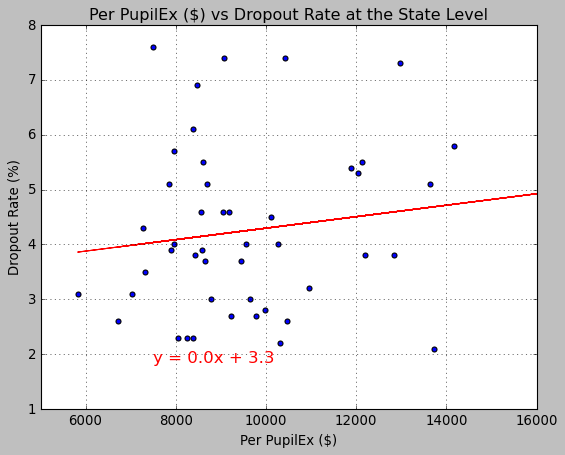

The correlation between both factors is 0.1698


In [9]:
# Total Support vs Dropout Rate
x_values = summary_2007['Per PupilEx ($)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

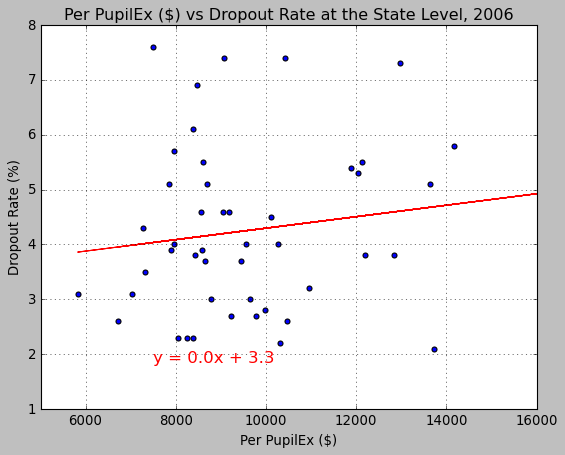

The correlation between both factors is 0.1698


In [10]:
# Total Support vs Dropout Rate
x_values = summary_2007['Per PupilEx ($)']
y_values = summary_2007['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7500,1.85),fontsize=15,color="red")
plt.xlabel('Per PupilEx ($)')
plt.ylabel('Dropout Rate (%)')
plt.title('Per PupilEx ($) vs Dropout Rate at the State Level, 2006')
plt.xlim(left = 5000, right = 16000)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")